In [1]:
import qrcode

In [2]:
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data('https://crhisbenitz.github.io/karorgan')
qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")

In [3]:
import PIL
from PIL import Image, ImageDraw

In [4]:
#Custom function for eye styling. These create the eye masks

def style_inner_eyes(img):
    img_size = img.size[0]
    eye_size = 70 #default
    quiet_zone = 40 #default
    mask = Image.new('L', img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.rectangle((60, 60, 90, 90), fill=255) #top left eye
    draw.rectangle((img_size-90, 60, img_size-60, 90), fill=255) #top right eye
    draw.rectangle((60, img_size-90, 90, img_size-60), fill=255) #bottom left eye
    return mask

def style_outer_eyes(img):
    img_size = img.size[0]
    eye_size = 70 #default
    quiet_zone = 40 #default
    mask = Image.new('L', img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.rectangle((40, 40, 110, 110), fill=255) #top left eye
    draw.rectangle((img_size-110, 40, img_size-40, 110), fill=255) #top right eye
    draw.rectangle((40, img_size-110, 110, img_size-40), fill=255) #bottom left eye
    draw.rectangle((60, 60, 90, 90), fill=0) #top left eye
    draw.rectangle((img_size-90, 60, img_size-60, 90), fill=0) #top right eye
    draw.rectangle((60, img_size-90, 90, img_size-60), fill=0) #bottom left eye  
    return mask  

In [5]:
import qrcode
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers import RoundedModuleDrawer,VerticalBarsDrawer,SquareModuleDrawer,GappedSquareModuleDrawer
from  qrcode.image.styles.colormasks import SolidFillColorMask, RadialGradiantColorMask

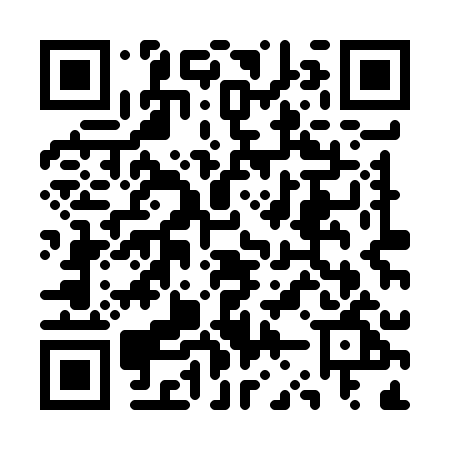

In [10]:
if not hasattr(PIL.Image, 'Resampling'):
    PIL.Image.Resampling = PIL.Image
    
if not hasattr(PIL.Image, 'Transpose'):  
    PIL.Image.Transpose = PIL.Image   

# Now PIL.Image.Resampling.BICUBIC is always recognized.


qr = qrcode.QRCode(version=2,error_correction=qrcode.constants.ERROR_CORRECT_H,)

qr.add_data('https://crhisbenitz.github.io/karorgan')

qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")

# qr_inner_eyes_img = qr.make_image(image_factory=StyledPilImage,
#                             eye_drawer=RoundedModuleDrawer(radius_ratio=1.2),
#                             color_mask=SolidFillColorMask(back_color=(255, 255, 255), front_color=(168, 19, 32)))

# qr_outer_eyes_img = qr.make_image(image_factory=StyledPilImage,
#                             eye_drawer=RoundedModuleDrawer(),
#                             color_mask=SolidFillColorMask(back_color=(255, 255, 255),front_color=(18, 136, 136)))                            

# qr_img = qr.make_image(image_factory=StyledPilImage,
#                        module_drawer=RoundedModuleDrawer(),
#                        color_mask = RadialGradiantColorMask(back_color=(255, 255, 255),
#                                                             center_color=(0, 255, 254),
#                                                             edge_color=(255, 0, 23)))

qr_img = qr.make_image(image_factory=StyledPilImage,
                       module_drawer=RoundedModuleDrawer())

# inner_eye_mask = style_inner_eyes(qr_img)
# outer_eye_mask = style_outer_eyes(qr_img)
# intermediate_img = Image.composite(qr_inner_eyes_img, qr_img, inner_eye_mask)
# final_image = Image.composite(qr_outer_eyes_img, intermediate_img, outer_eye_mask)
# # final_image.save('final_image.png')
 
# # set size of QR code
# Logo_link = 'kaggle.png'
# logo = Image.open(Logo_link) 

# taking base width
# basewidth = 100
# # adjust image size
# wpercent = (basewidth/float(logo.size[0]))
# hsize = int((float(logo.size[1])*float(wpercent)))
# logo = logo.resize((basewidth, hsize), Image.ANTIALIAS)
# logo_bg = Image.new("RGBA", final_image.size, color=(255,255,255,0))
# logo = logo.convert('RGBA')
# pos = ((final_image.size[0] - logo.size[0]) // 2,
#        (final_image.size[1] - logo.size[1]) // 2)
# logo_bg.paste(logo,pos)

# final_image = final_image.convert('RGBA')
# Image.alpha_composite(final_image,logo_bg)

qr_img